In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [19]:
# 3
# 3 - Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil

BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Train data (cats and dogs in subfolders)
train_data_gen = train_image_generator.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Validation data (cats and dogs in subfolders)
val_data_gen = validation_image_generator.flow_from_directory(
    'cats_and_dogs/validation',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# -----------------------------
# FIX for test images (no labels)
# -----------------------------
test_dir = 'cats_and_dogs/test'
new_test_dir = 'cats_and_dogs/test_images/unknown'

# If not already moved, organize test images into a dummy "unknown" subfolder
if not os.path.exists(new_test_dir):
    os.makedirs(new_test_dir)
    for fname in os.listdir(test_dir):
        shutil.move(os.path.join(test_dir, fname), os.path.join(new_test_dir, fname))

# Test generator
test_data_gen = test_image_generator.flow_from_directory(
    'cats_and_dogs/test_images',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,   # no labels
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


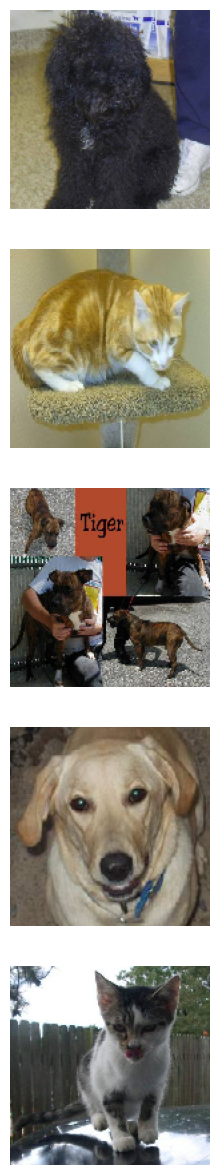

In [4]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


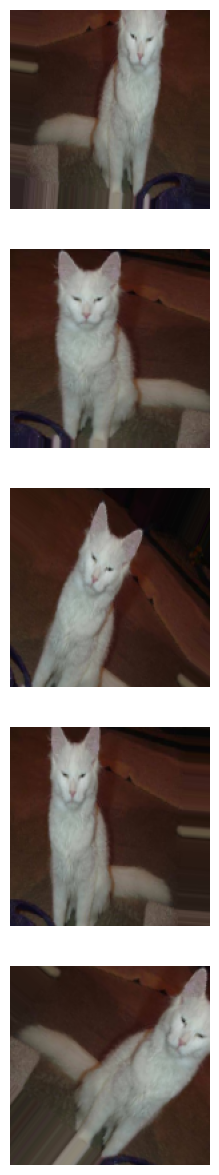

In [7]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')   # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=15,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 117s 7s/step - accuracy: 0.4954 - loss: 0.9393 - val_accuracy: 0.5440 - val_loss: 0.6754
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.5454 - loss: 0.6790 - val_accuracy: 0.6080 - val_loss: 0.6570
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step - accuracy: 0.5864 - loss: 0.6583 - val_accuracy: 0.6080 - val_loss: 0.6548
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 149s 8s/step - accuracy: 0.5871 - loss: 0.6598 - val_accuracy: 0.5960 - val_loss: 0.6455
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.6184 - loss: 0.6442 - val_accuracy: 0.6360 - val_loss: 0.6162
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 121s 8s/step - accuracy: 0.6264 - loss: 0.6375 - val_accuracy: 0.6860 - val_loss: 0.6016
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 135s 7s/step - accuracy: 0.6607 - loss: 0.6152 - val_accuracy: 0.6490 - val_loss: 0.6088
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.6269 - loss: 0.6309 - val_accuracy: 0.6590 - v

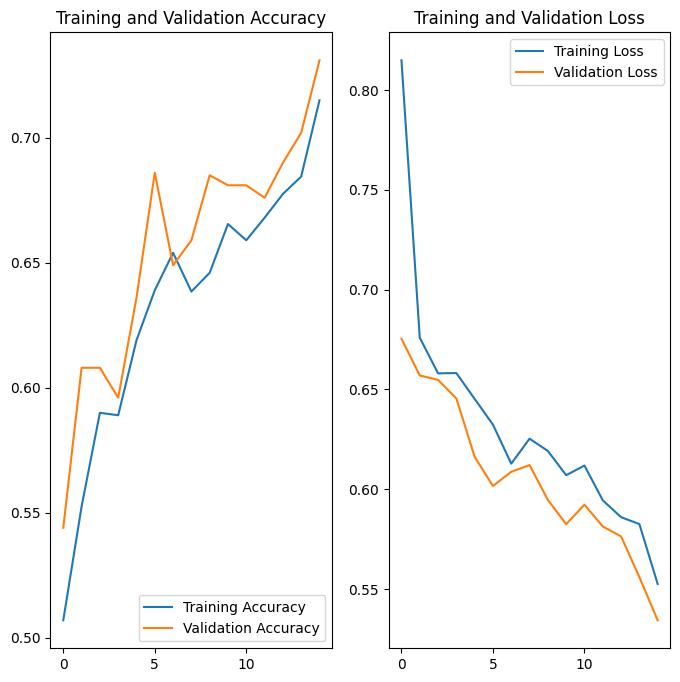

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plotImages(test_gen, probabilities, n=10):
    """
    Display first n test images with predicted probabilities.
    """
    images, preds = [], []

    # Get file paths
    file_paths = test_gen.filepaths

    for i in range(n):
        # Load one image
        img, = next(test_gen)  # unpack because batch_size=1
        img = np.squeeze(img)  # remove batch dimension -> (150,150,3)
        images.append(img)

        # Predicted probability
        prob = probabilities[i][0]
        label = "Dog" if prob > 0.5 else "Cat"
        preds.append(f"{label} ({prob:.2f})")

    # Plot
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(images[i])
        plt.title(preds[i])
        plt.axis("off")
    plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
First 10 predicted classes: [1 0 0 1 1 1 1 0 1 1]


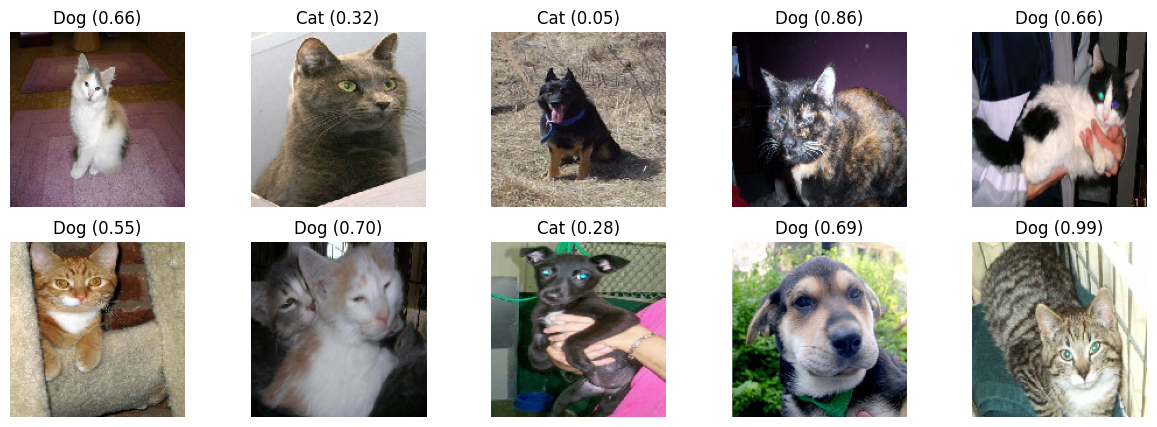

In [23]:
# 10 - Predict on test images

probabilities = model.predict(test_data_gen, steps=len(test_data_gen), verbose=1)

# Optional: round to class labels (0 = cat, 1 = dog)
predicted_classes = (probabilities > 0.5).astype("int32")

# Show first 10 predictions
print("First 10 predicted classes:", predicted_classes[:10].flatten())

# If you have a helper function to plot images
plotImages(test_data_gen, probabilities=probabilities)


In [25]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
    prob_value = float(probability)   # convert [0.73] → 0.73
    if round(prob_value) == answer:
        correct += 1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")


Your model correctly identified 78.0% of the images of cats and dogs.
You passed the challenge!


/tmp/ipython-input-1821097907.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prob_value = float(probability)   # convert [0.73] → 0.73
